In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats

In [12]:
l= np.array([54.8,50.8,45.9,41.3,36.8])
t_1 = np.array([16.92,16.88,16.41,16.02,15.95])
t_2 = np.array([17.01,16.66,16.22,16.18,15.91])
t_1_periodo = np.array([t_1[i]/10 for i in range(len(t_1))])
t_2_periodo = np.array([t_2[i]/10 for i in range(len(t_2))])
g = 980
l_total = 111.2
angulo = 8

def promedio(x,y):
    return (x+y)/2

t_prom = np.array([promedio(t_1_periodo[i],t_2_periodo[i]) for i in range(len(t_1))])

tabla_1 = pd.DataFrame({
    'l (cm)': l,
    'T_1 (cm):': t_1_periodo,
    'T_2 (cm)': t_2_periodo,
    'T (s)': t_prom
})
tabla_1



,l (cm),T_1 (cm):,T_2 (cm),T (s)
0,54.8,1.692,1.701,1.6965
1,50.8,1.688,1.666,1.6770
2,45.9,1.641,1.622,1.6315
3,41.3,1.602,1.618,1.6100
4,36.8,1.595,1.591,1.5930


In [7]:
def gamma(x):
    return x**2

def z(x,t):
    return x*((t/(2*np.pi))**2)

Z = np.array([z(l[i],t_prom[i]) for i in range(len(l))])
GAMMA = np.array([gamma(l[i]) for i in range(len(l))])

tabla_2 = pd.DataFrame({'L (cm)': l, 'T (s)': t_prom, 'Z': Z, 'GAMMA': GAMMA})
tabla_2

    

,L (cm),T (s),Z,GAMMA
0,54.8,1.6965,3.995108,3003.04
1,50.8,1.6770,3.618846,2580.64
2,45.9,1.6315,3.094761,2106.81
3,41.3,1.6100,2.711703,1705.69
4,36.8,1.5930,2.365482,1354.24


In [8]:
def regresion_1(t,gamma):
  slope, intercept, r, p, std_err = stats.linregress(t,gamma)
  def myfunc(x):
    return slope * x + intercept
  
  mymodel = list(map(myfunc, t))
  
  r_squared = r**2
  
  print('slope:', slope)
  print('intercept:', intercept)
  print('r:', r)
  print('R^2:', r_squared)
  print('p:', p)
  print('std_err:', std_err)
  return mymodel

In [9]:
R = regresion_1(GAMMA,Z)

slope: 0.0009991905407249493
intercept: 1.0088363523151367
r: 0.9995477579337462
R^2: 0.9990957203903789
p: 1.1544119914743088e-05
std_err: 1.7355435117340662e-05


Periodo con el péndulo físico establece que de la ecuación:
$$
T=2\pi\sqrt{\frac{1/12(L^2+x^2)}{gx}}
$$
nos permite obtener:

$$
z=a\gamma+b \qquad a=\frac{1}{g} \qquad b=\frac{L^2}{12g}
$$

In [10]:
#Error procentual
def error_porcentual(x):
    return (g-x)*100/g


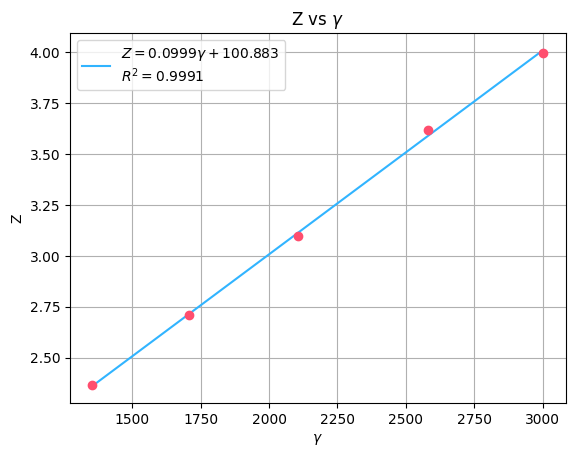

In [11]:
graf_1 = plt.figure(1)
plt.plot(GAMMA,R, color='#31b4ff',label=r'$Z = 0.0999\gamma + 100.883$' + '\n' + r'$R^2 = 0.9991$')
plt.plot(GAMMA,Z,'o',color='#ff4e6e')
plt.xlabel(r'$\gamma$')
plt.ylabel('Z')
plt.title(r'Z vs $\gamma$')
plt.legend()
plt.grid()
plt.show()
